# Conda OpenTURNS downloads statistics 

This document gathers conda download statistics for OpenTURNS.

## References

https://www.anaconda.com/blog/get-python-package-download-statistics-with-condastats

## Installation

    conda install -c conda-forge condastats pandas

In [1]:
import subprocess
import pandas as pd
import pylab as pl

In [2]:
!condastats overall openturns

pkg_name
openturns    441540
Name: counts, dtype: int64


In [3]:
result = subprocess.run(["condastats", "overall" , "--monthly", "openturns"], stdout=subprocess.PIPE)
print(result.stdout)

b'pkg_name   time   \nopenturns  2017-03        8\n           2017-04      882\n           2017-05      532\n           2017-06     1126\n           2017-07      867\n           2017-08      548\n           2017-09      243\n           2017-10      503\n           2017-11      666\n           2017-12     1042\n           2018-01     1224\n           2018-02     2448\n           2018-03     1143\n           2018-04     1486\n           2018-05     1250\n           2018-06     3358\n           2018-07     5823\n           2018-08     7284\n           2018-09     5545\n           2018-10     8173\n           2018-11     7063\n           2018-12    17430\n           2019-01     3404\n           2019-02     2424\n           2019-03     1945\n           2019-04     1253\n           2019-05     2896\n           2019-06     2624\n           2019-07     2334\n           2019-08     1916\n           2019-09     1108\n           2019-10     3701\n           2019-11     3476\n           2019-12   

In [4]:
otstats = result.stdout

In [5]:
data = otstats.split()
data[:10]

[b'pkg_name',
 b'time',
 b'openturns',
 b'2017-03',
 b'8',
 b'2017-04',
 b'882',
 b'2017-05',
 b'532',
 b'2017-06']

In [6]:
index = 3
values = []
monthList = []
while index < len(data) - 4:
    month = data[index].decode('UTF-8')
    monthList.append(month)
    downloads = float(data[index + 1]) / 1000.0
    values.append(downloads)
    print(month, downloads)
    index += 2

2017-03 0.008
2017-04 0.882
2017-05 0.532
2017-06 1.126
2017-07 0.867
2017-08 0.548
2017-09 0.243
2017-10 0.503
2017-11 0.666
2017-12 1.042
2018-01 1.224
2018-02 2.448
2018-03 1.143
2018-04 1.486
2018-05 1.25
2018-06 3.358
2018-07 5.823
2018-08 7.284
2018-09 5.545
2018-10 8.173
2018-11 7.063
2018-12 17.43
2019-01 3.404
2019-02 2.424
2019-03 1.945
2019-04 1.253
2019-05 2.896
2019-06 2.624
2019-07 2.334
2019-08 1.916
2019-09 1.108
2019-10 3.701
2019-11 3.476
2019-12 4.853
2020-01 4.123
2020-02 4.638
2020-03 2.993
2020-04 19.419
2020-05 4.0
2020-06 2.641
2020-07 5.001
2020-08 6.281
2020-09 3.652
2020-10 5.42
2020-11 3.068
2020-12 3.651
2021-01 4.398
2021-02 13.394
2021-03 13.478
2021-04 13.547
2021-05 10.151
2021-06 14.149
2021-07 11.772
2021-08 12.433
2021-09 11.32
2021-10 11.953
2021-11 11.877
2021-12 8.045
2022-01 5.589
2022-02 5.471
2022-03 7.675
2022-04 6.115
2022-05 15.71
2022-06 12.631
2022-07 11.777
2022-08 9.504
2022-09 13.634
2022-10 15.571
2022-11 19.441
2022-12 10.527
2023-01 

In [7]:
df = pd.DataFrame(data=values, index=monthList, columns=["Downloads x1000"])

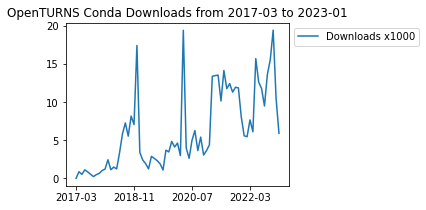

In [10]:
df.plot(figsize=(4.0,3.0));
pl.title("OpenTURNS Conda Downloads from %s to %s" % (monthList[0], monthList[-1]));
pl.savefig("openturns-conda-downloads.png", bbox_inches="tight")
_ = pl.legend(bbox_to_anchor = (1.0, 1.0))